Name: **Zhenmin Hua**  
USC_ID: **5905057247**  
Github username: **Zeddhua2077**

# 552_hw6

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import model_selection
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut, cross_val_score
from imblearn.pipeline import Pipeline as imbpipeline
import warnings
warnings.filterwarnings('ignore')

## Tree-Based Methods

### (a) download

In [3]:
train_set = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20)
test_set = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20)

In [4]:
train_set

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [4]:
train_set['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

### (b) Data Preparation

#### (i) data imputation techniques

In [5]:
df = pd.concat([train_set, test_set], axis=0)

In [6]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_new = df.replace('na', np.nan)
df_new.iloc[:,1:] = df_new.iloc[:,1:].astype(float)
df_new = pd.concat([pd.DataFrame(df_new['class']).reset_index(drop=True), pd.DataFrame(imp_mean.fit_transform(df_new.iloc[:,1:])).reset_index(drop=True)], axis=1)
df_new.columns = df.columns
df_new

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,neg,81852.0,0.72556,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,neg,18.0,0.00000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,neg,79636.0,0.72556,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,neg,110.0,0.72556,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


#### (ii) coefficient of variation CV

In [7]:
data = df_new.iloc[:,1:]
cv = {}
for i in data.columns:
    cv[i] = np.std(data[i]) / np.mean(data[i])
cv

{'aa_000': 4.328579357658981,
 'ab_000': 2.17825826315615,
 'ac_000': 2.1676390476139478,
 'ad_000': 206.7201395674251,
 'ae_000': 22.293523760136438,
 'af_000': 18.208895706342073,
 'ag_000': 91.46005187903083,
 'ag_001': 42.08406565798456,
 'ag_002': 17.62579260711921,
 'ag_003': 8.753241932670388,
 'ag_004': 5.475080234814747,
 'ag_005': 2.9642104294634604,
 'ag_006': 2.352572404565677,
 'ag_007': 2.8124794718196666,
 'ag_008': 6.274938796993257,
 'ag_009': 32.16684571446338,
 'ah_000': 2.3155248608753944,
 'ai_000': 18.50618637635426,
 'aj_000': 43.14419571739157,
 'ak_000': 78.62247047770788,
 'al_000': 9.111931274137955,
 'am_0': 9.06713580113152,
 'an_000': 2.2542118217710585,
 'ao_000': 2.276099502280165,
 'ap_000': 3.0858645854555893,
 'aq_000': 2.8534525445182277,
 'ar_000': 10.569132787357038,
 'as_000': 113.88200615204966,
 'at_000': 23.186907381289416,
 'au_000': 86.08507115669543,
 'av_000': 5.730447656843863,
 'ax_000': 3.8590096049509883,
 'ay_000': 40.90224965937051,
 

#### (iii) correlation matrix

In [8]:
data.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.019725,-0.011658,-0.000541,0.025795,0.035994,0.011682,0.076378,0.195161,0.307443,...,0.414125,0.419912,0.409659,0.419780,0.425679,0.356969,0.259668,0.133764,0.006688,0.010330
ab_000,0.019725,1.000000,-0.010898,0.000066,0.024869,0.043276,0.000590,0.006547,0.023484,0.035696,...,0.025161,0.037052,0.028766,0.034201,0.023921,0.013598,0.002371,0.000506,0.046897,0.075683
ac_000,-0.011658,-0.010898,1.000000,-0.002030,-0.004769,-0.010612,0.015534,-0.002333,-0.009439,-0.022889,...,-0.009808,-0.006437,-0.007962,-0.008115,-0.014680,-0.018631,0.010435,0.017293,-0.006191,0.015826
ad_000,-0.000541,0.000066,-0.002030,1.000000,-0.000195,-0.000236,-0.000038,-0.000034,-0.000093,-0.000223,...,-0.000883,-0.000921,-0.000908,-0.000730,-0.000745,-0.000462,-0.000794,-0.000500,-0.000082,-0.000091
ae_000,0.025795,0.024869,-0.004769,-0.000195,1.000000,0.829986,-0.000441,-0.000609,0.001948,0.020678,...,0.012751,0.019441,0.012847,0.026437,0.066533,0.036619,-0.008393,-0.006952,0.063587,0.030854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.356969,0.013598,-0.018631,-0.000462,0.036619,0.046482,0.007631,0.068003,0.181967,0.475570,...,0.442199,0.432911,0.419633,0.380132,0.543449,1.000000,0.227098,0.063065,-0.000309,0.000946
ee_008,0.259668,0.002371,0.010435,-0.000794,-0.008393,-0.010843,0.000067,0.005353,0.009109,0.020684,...,0.442532,0.470574,0.448390,0.394020,0.365686,0.227098,1.000000,0.690147,-0.005173,-0.001950
ee_009,0.133764,0.000506,0.017293,-0.000500,-0.006952,-0.008539,-0.001103,-0.003540,-0.009089,-0.018164,...,0.224587,0.235844,0.220785,0.183844,0.158590,0.063065,0.690147,1.000000,-0.003168,-0.001059
ef_000,0.006688,0.046897,-0.006191,-0.000082,0.063587,0.093474,-0.000076,0.001140,0.005625,0.011036,...,0.003718,0.010177,0.002989,0.026924,0.005298,-0.000309,-0.005173,-0.003168,1.000000,0.222579


<AxesSubplot:>

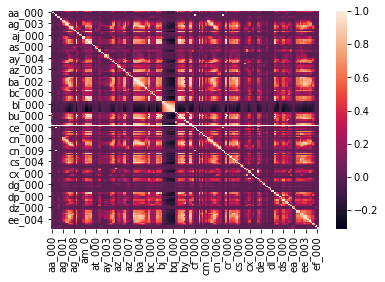

In [9]:
sns.heatmap(data.corr())

#### (iv) Scatter/box plot

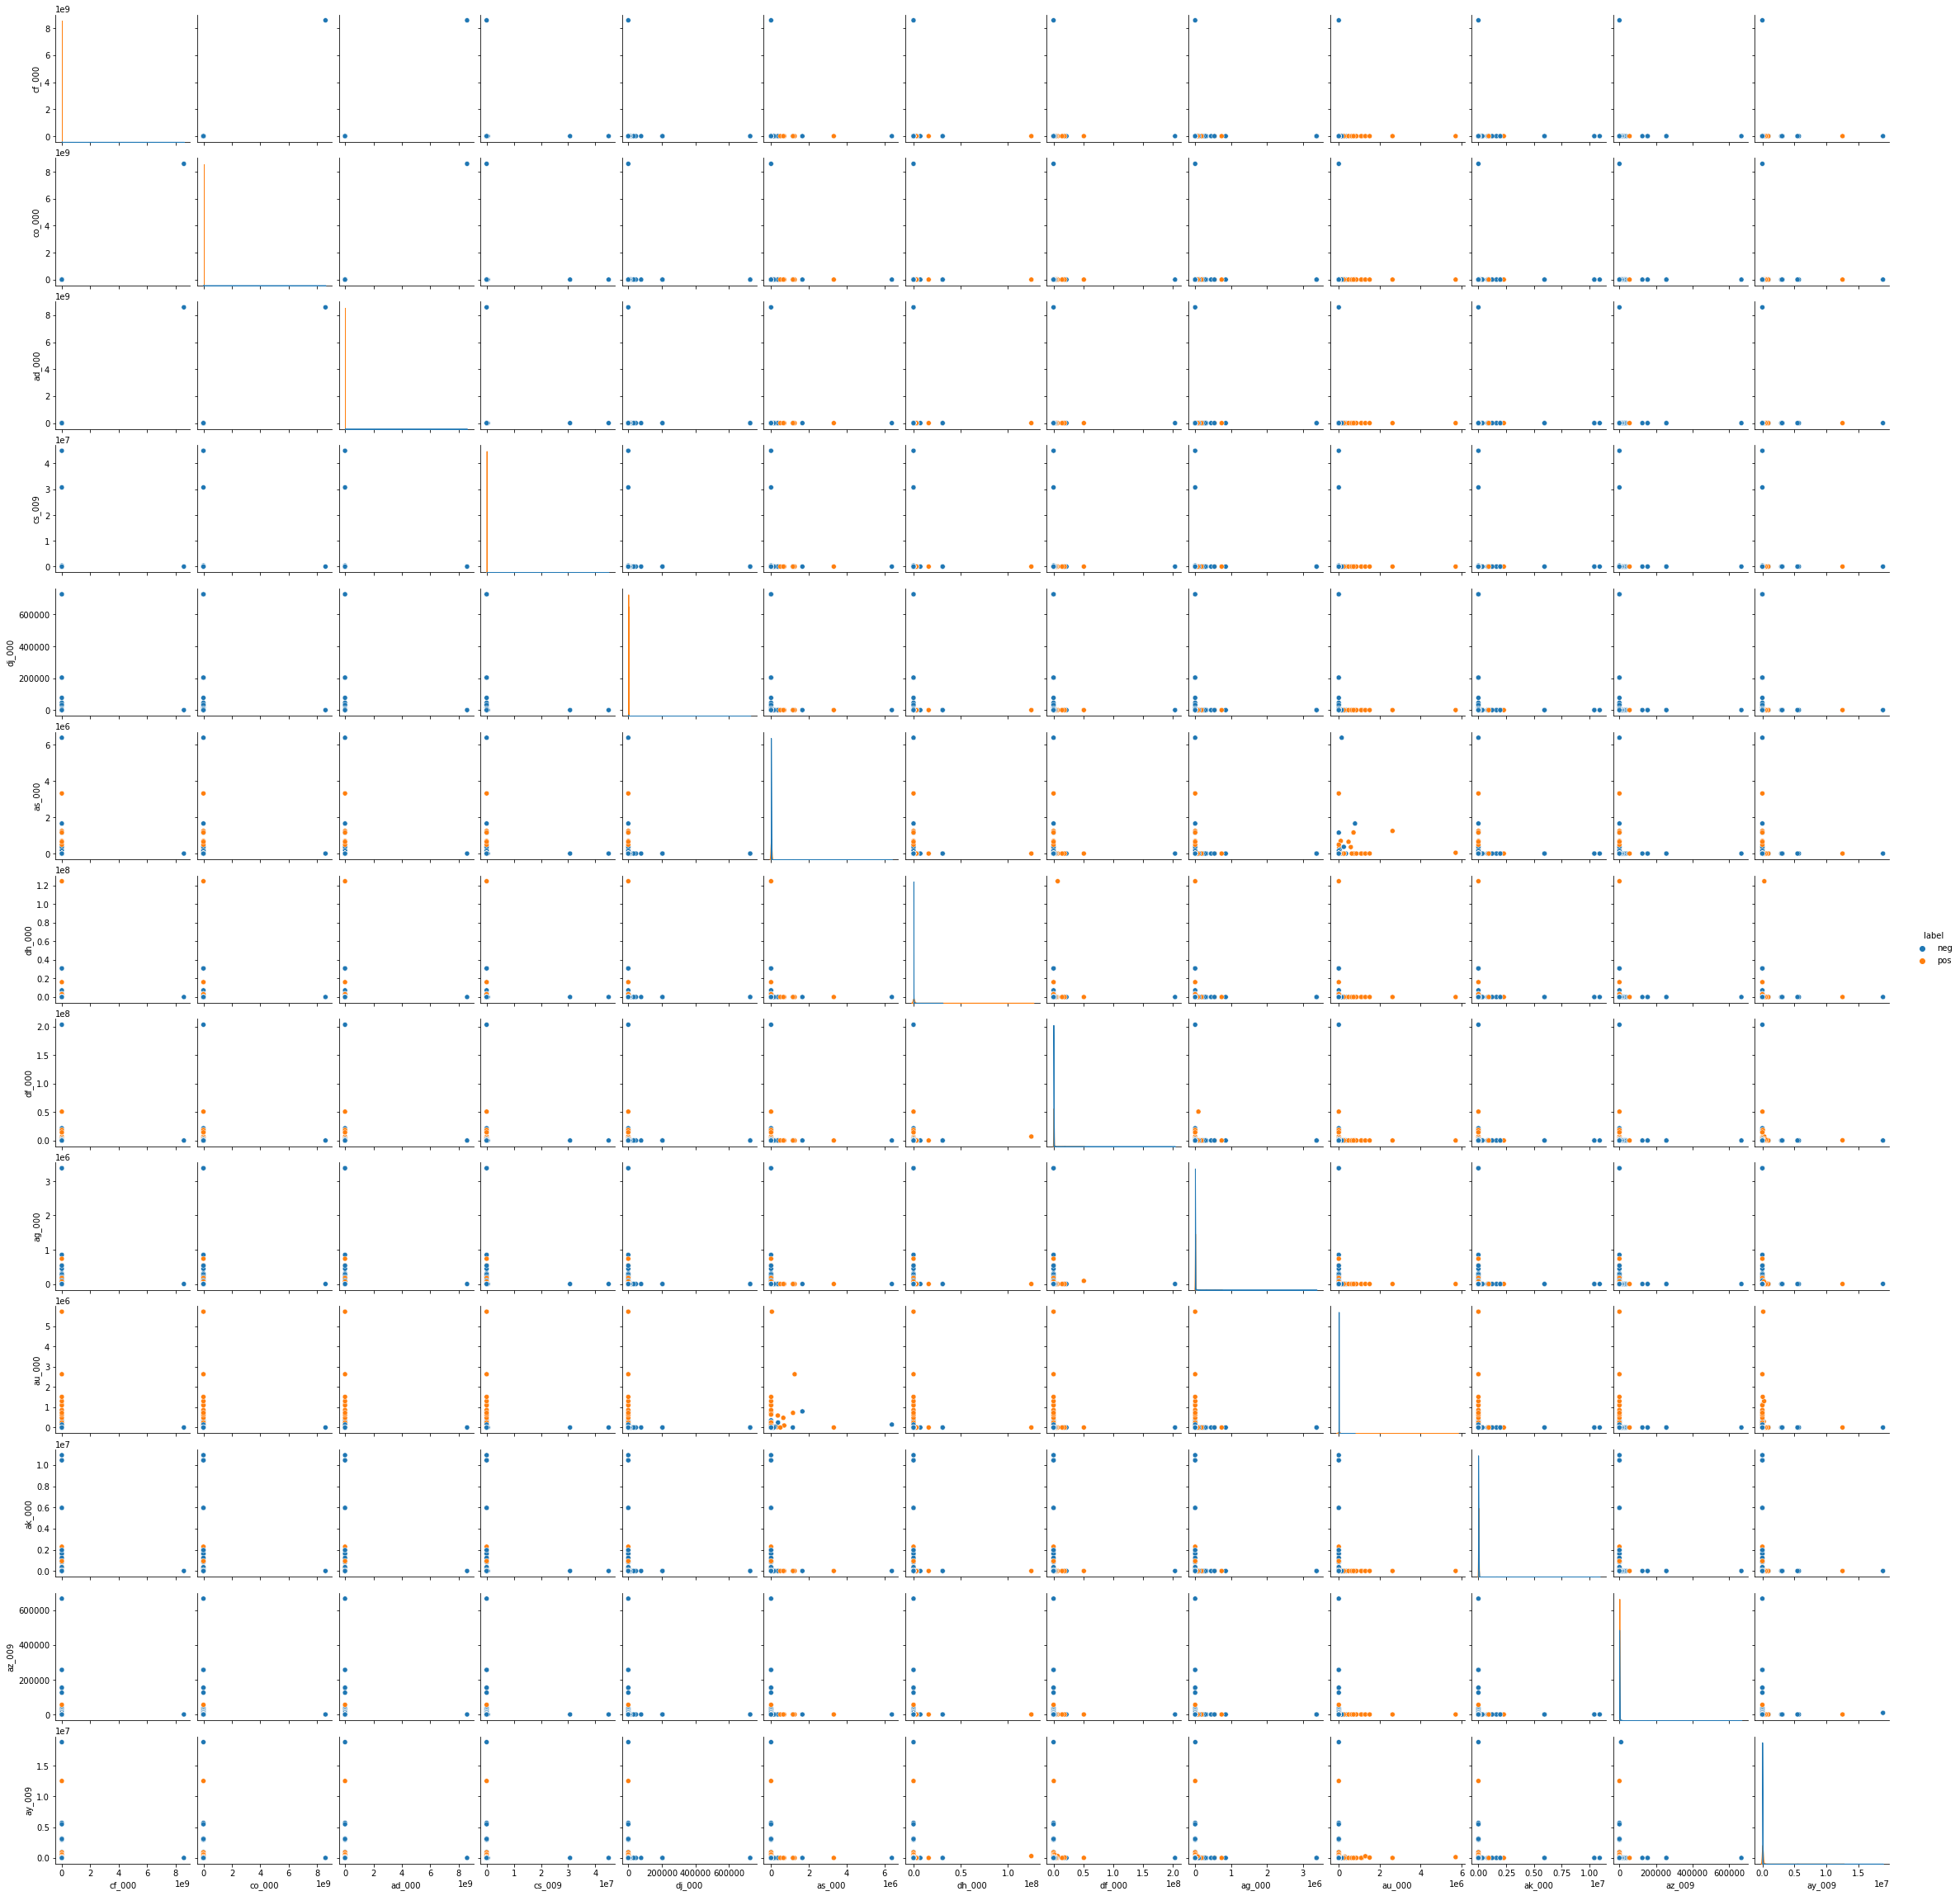

In [11]:
num = int(170 ** 0.5)
features = [i[1] for i in sorted([(v,k) for (k,v) in cv.items()], reverse=True)[:num]]
df_new_features = df_new[features]
df_new_features['label'] = df_new['class']
sns.pairplot(df_new_features, hue='label')

<AxesSubplot:>

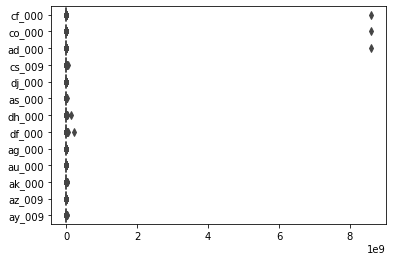

In [12]:
sns.boxplot(data=df_new_features, orient="h")

#### (v) determine

In [13]:
df_new['class'].value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

**Yes. The data set is severely imbalanced.**

### (c) random forest

In [14]:
df_new = df_new.replace('neg', 0).replace('pos', 1)
train = df_new.iloc[:60000,:]
test = df_new.iloc[60000:,:]

x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]
x_test = test.iloc[:,1:]
y_test = test.iloc[:,:1]

rf = RandomForestClassifier(oob_score=True, random_state=30)
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# train set
print('train_set:')
print('confusion_matrix:', '\n', confusion_matrix(y_train, y_pred_train))
print ('Accuracy: %.5f' % accuracy_score(y_train, y_pred_train))
print ('Misclassification: %.5f' % (1 - accuracy_score(y_train, y_pred_train)))
print('roc_auc_score: %.5f' % roc_auc_score(y_train, y_pred_train))
print()
# test set
print('test_set:')
print('confusion_matrix:', '\n', confusion_matrix(y_test, y_pred_test))
print ('Accuracy: %.5f' % accuracy_score(y_test, y_pred_test))  
print ('Misclassification: %.5f' % (1 - accuracy_score(y_test, y_pred_test)))
print('roc_auc_score: %.5f' % roc_auc_score(y_test, y_pred_test))
print()
# Calculate Out of Bag error estimate
print ('Test Error: %.5f' % (1 - accuracy_score(y_test, y_pred_test)))
print('Out of Bag error estimate: ', (1 - rf.oob_score_))

train_set:
confusion_matrix: 
 [[59000     0]
 [    0  1000]]
Accuracy: 1.00000
Misclassification: 0.00000
roc_auc_score: 1.00000

test_set:
confusion_matrix: 
 [[15610    15]
 [  110   265]]
Accuracy: 0.99219
Misclassification: 0.00781
roc_auc_score: 0.85285

Test Error: 0.00781
Out of Bag error estimate:  0.006116666666666659


### (d) class imbalance

**adjusting 'class_weight' hyperparameter to deal with class imbalance**

In [8]:
# class_weight={0:1,1:60}/'balanced'
rf = RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=30)
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# train set
print('train_set:')
print('confusion_matrix:', '\n', confusion_matrix(y_train, y_pred_train))
print ('Accuracy: %.5f' % accuracy_score(y_train, y_pred_train))
print ('Misclassification: %.5f' % (1 - accuracy_score(y_train, y_pred_train)))
print('roc_auc_score: %.5f' % roc_auc_score(y_train, y_pred_train))
print()
# test set
print('test_set:')
print('confusion_matrix:', '\n', confusion_matrix(y_test, y_pred_test))
print ('Accuracy: %.5f' % accuracy_score(y_test, y_pred_test))  
print ('Misclassification: %.5f' % (1 - accuracy_score(y_test, y_pred_test)))
print('roc_auc_score: %.5f' % roc_auc_score(y_test, y_pred_test))
print()
# Calculate Out of Bag error estimate
print ('Test Error: %.5f' % (1 - accuracy_score(y_test, y_pred_test)))
print('Out of Bag error estimate: ', (1 - rf.oob_score_))

train_set:
confusion_matrix: 
 [[59000     0]
 [    0  1000]]
Accuracy: 1.00000
Misclassification: 0.00000
roc_auc_score: 1.00000

test_set:
confusion_matrix: 
 [[15611    14]
 [  164   211]]
Accuracy: 0.98887
Misclassification: 0.01113
roc_auc_score: 0.78089

Test Error: 0.01113
Out of Bag error estimate:  0.007966666666666677


### (e) xgboost

In [17]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]
x_test = test.iloc[:,1:]
y_test = test.iloc[:,:1]

# grid search
xgb_test = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=30)
param_test = {'reg_alpha':[0.1, 0.5, 1.0, 1.5, 2.0, 10]}

grid = GridSearchCV(xgb_test, param_test, scoring='roc_auc', cv=5)
grid.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, grid.best_score_))

# model with best alpha
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', reg_alpha=grid.best_params_['reg_alpha'], random_state=30)
xgb.fit(x_train, y_train)

# test error
y_pred = xgb.predict(x_test)
test_error = 1 - accuracy_score(y_test, y_pred)
print('test_error:', test_error)

# train error using cv
train_error_5_fold = 1 - cross_val_score(xgb, x_train, y_train, cv=5, scoring='accuracy')
print('train_error_5_fold_estimate:', np.mean(train_error_5_fold))

# report
print()
# train set
y_pred_train = xgb.predict(x_train)
print('train_set:')
print('confusion_matrix:', '\n', confusion_matrix(y_train, y_pred_train))
print ('Accuracy: %.5f' % accuracy_score(y_train, y_pred_train))
print ('Misclassification: %.5f' % (1 - accuracy_score(y_train, y_pred_train)))
print('roc_auc_score: %.5f' % roc_auc_score(y_train, y_pred_train))
print()
# test set
print('test_set:')
print('confusion_matrix:', '\n', confusion_matrix(y_test, y_pred))
print ('Accuracy: %.5f' % accuracy_score(y_test, y_pred))  
print ('Misclassification: %.5f' % (1 - accuracy_score(y_test, y_pred)))
print('roc_auc_score: %.5f' % roc_auc_score(y_test, y_pred))

The best parameters are {'reg_alpha': 1.0} with a score of 0.99092
test_error: 0.005437499999999984
train_error_5_fold_estimate: 0.005583333333333318

train_set:
confusion_matrix: 
 [[59000     0]
 [    1   999]]
Accuracy: 0.99998
Misclassification: 0.00002
roc_auc_score: 0.99950

test_set:
confusion_matrix: 
 [[15613    12]
 [   75   300]]
Accuracy: 0.99456
Misclassification: 0.00544
roc_auc_score: 0.89962


### (f) SMOTE

In [ ]:
# right way of using smote (smote inside cross validation)
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]
#x_train, y_train = SMOTE().fit_resample(x_train, y_train)
x_test = test.iloc[:,1:]
y_test = test.iloc[:,:1]

# grid search
xgb_test = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=30)
param_test = {'classifier__reg_alpha':[0.1, 0.5, 1.0, 1.5, 2.0, 10]}
pipeline = imbpipeline(steps=[['smote', SMOTE(random_state=30)], ['classifier', xgb_test]])

grid = GridSearchCV(pipeline, param_test, scoring='accuracy', cv=5)
grid.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, grid.best_score_))

# train error
train_error = 1 - grid.best_score_
print('train_error:', train_error)

# test error
test_error = 1 - grid.score(x_test, y_test)
print('test_error:', test_error)

# report
print()
# train set
y_pred_train = grid.predict(x_train)
print('train_set:')
print('confusion_matrix:', '\n', confusion_matrix(y_train, y_pred_train))
print ('Accuracy: %.5f' % accuracy_score(y_train, y_pred_train))
print ('Misclassification: %.5f' % (1 - accuracy_score(y_train, y_pred_train)))
print('roc_auc_score: %.5f' % roc_auc_score(y_train, y_pred_train))
print()
# test set
y_pred = grid.predict(x_test)
print('test_set:')
print('confusion_matrix:', '\n', confusion_matrix(y_test, y_pred))
print ('Accuracy: %.5f' % accuracy_score(y_test, y_pred))  
print ('Misclassification: %.5f' % (1 - accuracy_score(y_test, y_pred)))
print('roc_auc_score: %.5f' % roc_auc_score(y_test, y_pred))

**output from colab**
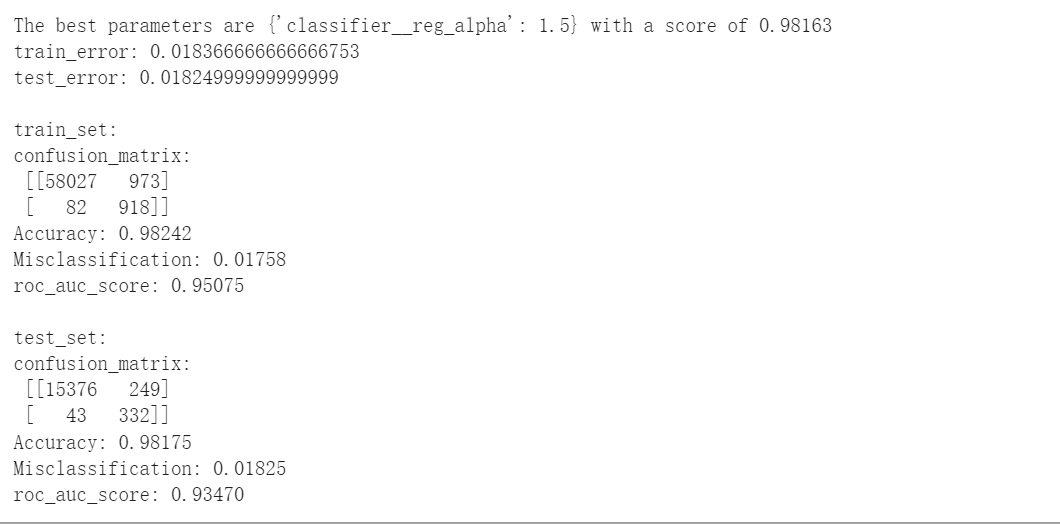

In [ ]:
# wrong way of using smote (smote outside cross validation)
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
x_test = test.iloc[:,1:]
y_test = test.iloc[:,:1]

# grid search
xgb_test = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=30)
param_test = {'reg_alpha':[0.1, 0.5, 1.0, 1.5, 2.0, 10]}

grid = GridSearchCV(xgb_test, param_test, scoring='roc_auc', cv=5)
grid.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, grid.best_score_))

# model with best alpha
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', reg_alpha=grid.best_params_['reg_alpha'], random_state=30)
xgb.fit(x_train, y_train)

# test error
y_pred = xgb.predict(x_test)
test_error = 1 - accuracy_score(y_test, y_pred)
print('test_error:', test_error)

# train error using cv
train_error_5_fold = 1 - cross_val_score(xgb, x_train, y_train, cv=5, scoring='accuracy')
print('train_error_5_fold_estimate:', np.mean(train_error_5_fold))

# report
print()
# train set
y_pred_train = xgb.predict(x_train)
print('train_set:')
print('confusion_matrix:', '\n', confusion_matrix(y_train, y_pred_train))
print ('Accuracy: %.5f' % accuracy_score(y_train, y_pred_train))
print ('Misclassification: %.5f' % (1 - accuracy_score(y_train, y_pred_train)))
print('roc_auc_score: %.5f' % roc_auc_score(y_train, y_pred_train))
print()
# test set
print('test_set:')
print('confusion_matrix:', '\n', confusion_matrix(y_test, y_pred))
print ('Accuracy: %.5f' % accuracy_score(y_test, y_pred))  
print ('Misclassification: %.5f' % (1 - accuracy_score(y_test, y_pred)))
print('roc_auc_score: %.5f' % roc_auc_score(y_test, y_pred))

**output from colab**
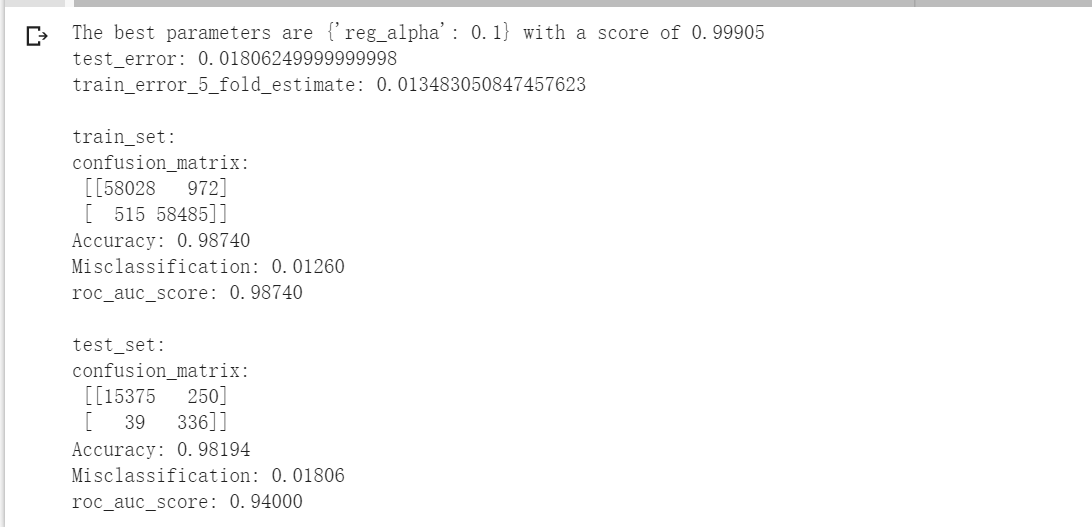

---

## ISLR 6.6.3

### (a) train RSS

**Steadily decrease.**  
As we increase the s, we contraint coefficients βj less and less. Therefore, the model tends to be more and more flexible which will finally lead to overfitting problem. So in this case, train error will steadily decrease.

### (b) test RSS

**Decrease initially, and then eventually start increasing in a U shape.**  
As I put in question (a), the model will tend to be more flexible. So the test error will go down at first. And when the model becomes too flexible which leads to overfitting problem, the test error will go up in a U shape.

### (c) variance

**Steadily increase.**  
As I put in question (a), the model will tend to be more flexible. So the model variance will keep going up.

### (d) (squared) bias

**Steadily decrease.**  
As I put in question a, the model will tend to be more flexible. So the model bias will keep going down.

### (e) irreducible error

**Remain constant.**  
The irreducible error is independant of the model, so it will not change with the s.

---

## ISLR 6.6.5

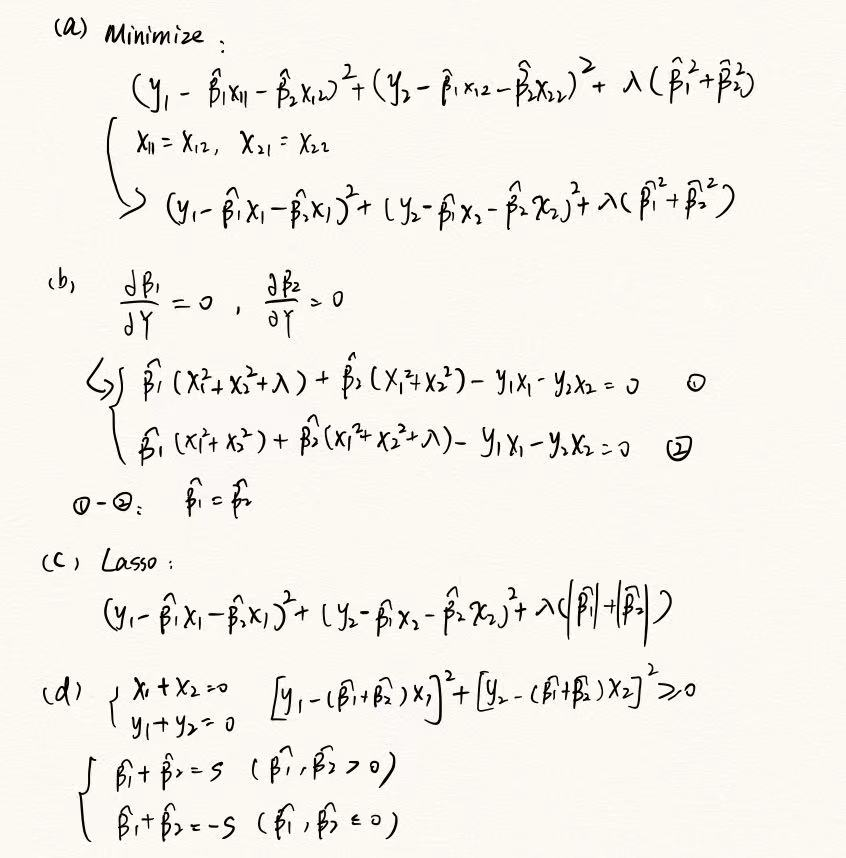

---

## ISLR 8.4.5

Majority vote approach：
- **Red**. Because it is the most common class among the 10 predictions (6 Red and 4 Green). 

Average probability approach: 
- **Green**. Because the average of the 10 probabilities is 0.45.

---

## ISLR 9.7.3

### (a) sketch

Text(0, 0.5, 'x2')

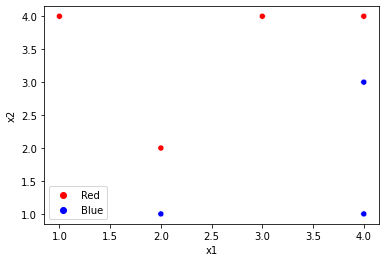

In [25]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']
sns.scatterplot(x1, x2, hue=y, palette=['red', 'blue'])
plt.xlabel('x1')
plt.ylabel('x2')

### (b) optimal separating hyperplane

Text(0.5, 1.0, 'optimal separating hyperplane: x1 − x2 − 0.5 = 0')

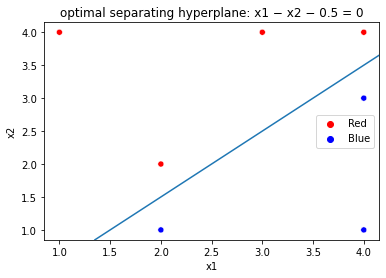

In [32]:
sns.scatterplot(x1, x2, hue=y, palette=['red', 'blue'])
plt.axline([2,1.5], [4,3.5])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('optimal separating hyperplane: x1 − x2 − 0.5 = 0')

### (c) classification rule

Classify to Red if X1 - X2 - 0.5 < 0, and classify to Blue otherwise.
- β0 = -0.5
- β1 = 1
- β2 = -1

### (d) margin

Text(0.5, 1.0, 'optimal separating hyperplane: x1 − x2 − 0.5 = 0')

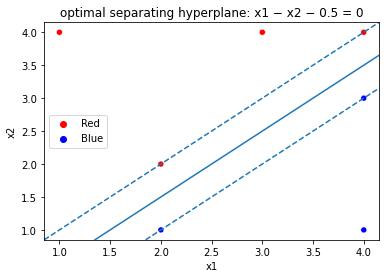

In [36]:
sns.scatterplot(x1, x2, hue=y, palette=['red', 'blue'])
plt.axline([2,1.5], [4,3.5])
plt.axline([2,1], [4,3], linestyle='--')
plt.axline([2,2], [4,4], linestyle='--')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('optimal separating hyperplane: x1 − x2 − 0.5 = 0')

### (e) support vectors

**Support vectors**
- (2,1)
- (4,3)
- (2,3)
- (4,4)

### (f) argue

The seventh observation is (4,1). This obserbation is far from the margin and it is not a support vector. Therefore,  a slight movement of this observation would not affect the maximal margin hyperplane.

### (g) random separating hyperplane

Text(0.5, 1.0, 'random separating hyperplane: 1.25x1 − x2 − 1.3 = 0')

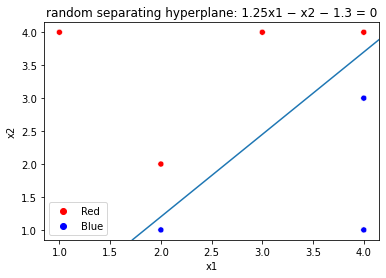

In [39]:
sns.scatterplot(x1, x2, hue=y, palette=['red', 'blue'])
plt.axline([2,1.2], [4,3.7])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('random separating hyperplane: 1.25x1 − x2 − 1.3 = 0')

### (h) additional observation

**Adding a new point(3,1) with 'Red' label, and the two classes are no longer separable by a hyperplane.**

Text(0, 0.5, 'x2')

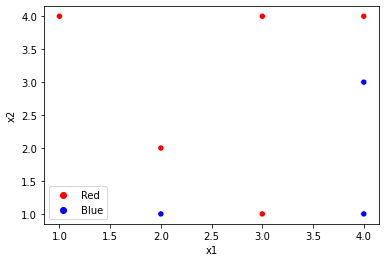

In [40]:
x1 = [3, 2, 4, 1, 2, 4, 4, 3]
x2 = [4, 2, 4, 4, 1, 3, 1, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Red']
sns.scatterplot(x1, x2, hue=y, palette=['red', 'blue'])
plt.xlabel('x1')
plt.ylabel('x2')